# This is an CNN model for lesion prediction.

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Instructions for updating:
Use tf.cast instead.


D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:54: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=250, epochs=25, validation_steps=2000)`


Epoch 1/25
250/250 [==============================] - 32s 127ms/step - loss: nan - acc: nan
Epoch 2/25
250/250 [==============================] - 31s 123ms/step - loss: nan - acc: nan
Epoch 3/25
250/250 [==============================] - 31s 123ms/step - loss: nan - acc: nan
Epoch 4/25
250/250 [==============================] - 31s 125ms/step - loss: nan - acc: nan
Epoch 5/25
250/250 [==============================] - 31s 125ms/step - loss: nan - acc: nan
Epoch 6/25
250/250 [==============================] - 31s 123ms/step - loss: nan - acc: nan
Epoch 7/25
250/250 [==============================] - 31s 124ms/step - loss: nan - acc: nan
Epoch 8/25
250/250 [==============================] - 31s 123ms/step - loss: nan - acc: nan
Epoch 9/25
250/250 [==============================] - 31s 124ms/step - loss: nan - acc: nan
Epoch 10/25
250/250 [==============================] - 31s 125ms/step - loss: nan - acc: nan
Epoch 11/25
250/250 [==============================] - 32s 128ms/step - loss: n

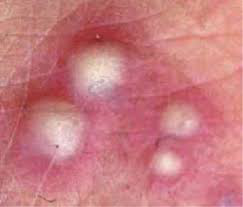

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import cv2


classifier = Sequential()
# first input 32 is no of filter applied and 3,3 is filter shape, input shape is image shape and last one is activation function
classifier.add(Convolution2D(32,3,3, input_shape = (64,64,3), activation='relu'))

# max pooling by 2,2 matrix
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Flattening
classifier.add(Flatten())

classifier.add(Dense(output_dim = 128, activation='relu'))

classifier.add(Dense(output_dim = 1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Image Augmentation is used to avoid overfitting
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255)

import os
os.chdir(r'C:\Users\Ashish\Desktop\check code\train lesion')

os.getcwd()

train_generator = train_datagen.flow_from_directory(r'C:\Users\Ashish\Desktop\check code\train lesion',
                                                   target_size=(64,64),
                                                   batch_size=32,
                                                   class_mode='binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\Ashish\Desktop\check code\test lesion',
                                           target_size=(64,64),
                                           batch_size=32,
                                           class_mode='binary')

classifier.fit_generator(train_generator,
                        samples_per_epoch = 8000,
                        nb_epoch = 25,
                        validation_data = test_set,
                        nb_val_samples = 2000)

#Predict new cases

import numpy as np
from keras.preprocessing import image

test_image = image.load_img(r'C:\Users\Ashish\Desktop\check code\train lesion\download14.jpg')

test_image



In [2]:
test_image = image.load_img(r'C:\Users\Ashish\Desktop\check code\train lesion\download14.jpg', 
                            target_size=(64,64))

In [3]:
test_image = image.img_to_array(test_image)

In [4]:
test_image.shape

(64, 64, 3)

In [5]:
test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)

(1, 64, 64, 3)


In [6]:
classifier.predict(test_image)

array([[0.9065317]], dtype=float32)

In [7]:
train_generator.class_indices

{}

In [8]:
#classification predict
classifier.summary()

import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Ashish\Desktop\check code\test lesion\download14.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'lesion'
    

print(prediction)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________
lesion
